# 2.5 布林带(Bollinger Band)策略
以k=20天ma均线为中心，设定两条线up和down，up = ma+k * SD,down = ma-k * SD,SD是这k=20天收盘价的标准值。这两条线形成一条带状，一般称up为压力线，down为支撑线，当股票价格往下跌破支撑线时，上升的几率会很大，同理冲破压力线时下跌几率大。

⭐类似于正态分布中的3$\sigma$原则，正态分布的Y的取值几乎全部集中在$(\mu -3\sigma,\mu+3\sigma)$区间内，超出这个范围的可能性仅占不到0.3%。当然，股票的价格是否符合正态分布，3$\sigma$中的3这个倍数在策略中如何调整，这些都是需要反复调整和验证的。

In [ ]:
def initialize(context):
    set_benchmark('000300.XSHG')
    set_option('use_real_price', True)
    set_order_cost(OrderCost(open_tax=0, close_tax=0.001, \
    open_commission=0.0003, close_commission=0.0003, \
    close_today_commission=0, min_commission=5),type='stock')
    
    g.security = '600036.XSHG'
    g.M = 20
    g.k = 2
    
def handle_data(context,data):
    sr = attribute_history(g.security, g.M)['close']
    ma = sr.mean()
    up = ma + g.k * sr.std()
    down = ma - g.k * sr.std()
    p = get_current_data()[g.security].day_open
    cash = context.portfolio.available_cash
    if p < down and g.security not in context.portfolio.positions:
        order_value(g.security, cash)
    elif p > up and g.security in context.portfolio.positions:
        order_target(g.security, 0)
        

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

import numpy as np
import pandas as pd
data = pd.read_csv('/data/量化交易策略回测结果/2.5布林带策略.csv',encoding = 'ansi')
data.head()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
0,2015-01-05 16:00:00,3.05,0.0,0.0,0.0,0,0,-2.96
1,2015-01-06 16:00:00,3.04,0.0,0.0,0.0,0,0,-2.95
2,2015-01-07 16:00:00,3.12,0.0,0.0,0.0,0,0,-3.03
3,2015-01-08 16:00:00,0.72,0.0,0.0,0.0,0,0,-0.71
4,2015-01-09 16:00:00,0.37,0.0,0.0,0.0,0,0,-0.37


In [3]:
data.tail()
# 把时间画进图像会挤在一起，所以这里展示回测时间，图中不再展示

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
727,2017-12-25 16:00:00,14.37,60.4,0.0,0.0,0,0,40.25
728,2017-12-26 16:00:00,14.71,60.4,0.0,0.0,0,0,39.83
729,2017-12-27 16:00:00,12.95,60.4,0.0,0.0,0,0,42.01
730,2017-12-28 16:00:00,13.73,60.4,0.0,0.0,0,0,41.04
731,2017-12-29 16:00:00,14.07,60.4,0.0,0.0,0,0,40.62


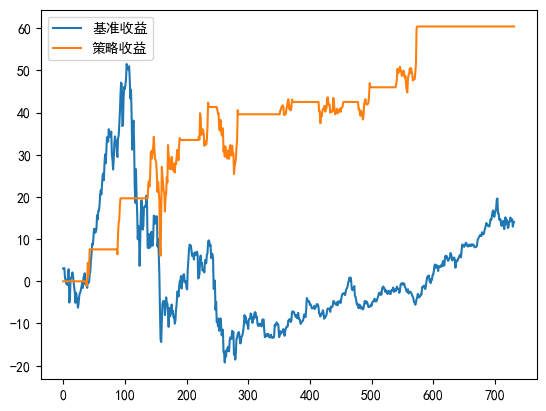

In [4]:
data[['基准收益', '策略收益']].plot()
plt.show()